In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
pip install features

In [ ]:
# !unzip -uq "/content/drive/My Drive/FruitsDB" -d "/content"

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import glob

In [3]:
def showImg(img, name):
    plt.axis("off")
    plt.title(name)
    plt.imshow(img)
    plt.show()

def _hog(img, B):
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
  mag,ang = cv2.cartToPolar(gx, gy)
  bins = np.int32((ang*B)/(2*np.pi))
  bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
  mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
  hists = [np.bincount(b.ravel(), m.ravel(), B) for b,m in zip(bin_cells, mag_cells)]
  hist = np.hstack(hists)
  return hist

def hog(img, B):
  r = img[:, :, 0]
  g = img[:, :, 1]
  b = img[:, :, 2]
  r = _hog(r, B)
  g = _hog(g, B)
  b = _hog(b, B)
  hist = np.concatenate((r,g,b))
  return hist

def load_data(fruit, tipo, B, clase, testing):
    label=[]
    arr = []
    dataset_path = '/content/drive/MyDrive/Fruit Classify/datasets'
    path_to_fruit = f'{dataset_path}/{fruit}/{tipo}/*'
    # strr = "FruitsDB/"+fruit+"/" + tipo + "/*"
    for file_ in glob.glob(path_to_fruit):
      img = cv2.imread(file_)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      h = hog(img, B)
      if(testing):
        arr.append(h)
      else:
        arr.append(img)
      label.append(clase)

    return arr,label

def whole_train_data(tipo, B):
  apples_data, apples_label = load_data('Apples', tipo, B, 0, 1)
  mangoes_data, mangoes_label = load_data('Mangoes', tipo, B, 1, 1)
  bananas_data, bananas_label = load_data('Bananas', tipo, B, 2, 1)
  print("Apples data shape:", len(apples_data))
  print("Mangoes data shape:", len(mangoes_data))
  print("Bananas data shape:", len(bananas_data))
  data =np.concatenate((apples_data,mangoes_data,bananas_data))
  labels =np.concatenate((apples_label, mangoes_label, bananas_label))
  return data, labels

In [4]:
data_train, labels_train = whole_train_data('Train', 16)
data_test, labels_test = whole_train_data('Test', 16)

Apples data shape: 862
Mangoes data shape: 980
Bananas data shape: 752
Apples data shape: 215
Mangoes data shape: 244
Bananas data shape: 188


In [5]:
data_test = np.vstack(data_test)
data_train = np.vstack(data_train)
labels_train = np.vstack(labels_train)
labels_test = np.vstack(labels_test)

data_train = np.float32(data_train)
data_test = np.float32(data_test)

In [6]:
print(data_train.shape)
print(labels_train.shape)
print(data_test.shape)
print(labels_test.shape)

(2594, 192)
(2594, 1)
(647, 192)
(647, 1)


In [7]:
def train_model(data_train, labels_train):
  svm = cv2.ml.SVM_create()
  svm.setKernel(cv2.ml.SVM_LINEAR)
  svm.setType(cv2.ml.SVM_C_SVC)
  svm.setC(2.67)
  svm.setGamma(5.383)

  svm.train(data_train, cv2.ml.ROW_SAMPLE, labels_train)
  return svm

In [8]:
def get_precission(svm, test_target, test):
  result = svm.predict(test)[1]
  mask = (result==test_target)
  correct = np.count_nonzero(mask)
  return (correct*100.0/result.size)

In [9]:
svm = train_model(data_train, labels_train)

In [10]:
svm.save('/content/drive/MyDrive/Fruit Classify/model.xml')

In [11]:
print("Precision del modelo es {}%".format(get_precission(svm, labels_test, data_test)))

Precision del modelo es 100.0%


**Trying our model**

In [5]:
classes = ["Apple", "Mango", "Bananas"]

In [6]:
apples_data, apples_label = load_data('Apples', 'Test', 0, 0, 0)
mangoes_data, mangoes_label = load_data('Mangoes', 'Test', 0, 1, 0)
bananas_data, bananas_label = load_data('Bananas', 'Test', 0, 2, 0)
data =np.concatenate((apples_data,mangoes_data,bananas_data))

NameError: name 'load_data' is not defined

In [ ]:
def try_predictor(data, data_test,x_):
  img = data[x_]
  result = int(svm.predict(data_test[x_].reshape(1,192))[1][0][0])
  result = classes[result]
  showImg(img, result)

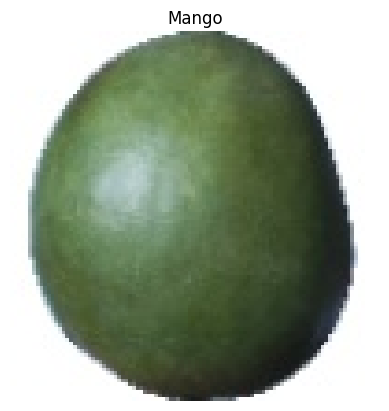

In [ ]:
from random import seed
from random import randint
x_ = randint(0, data.shape[0])
try_predictor(data, data_test, x_)

**Test với hình ảnh cục bộ từ máy tính**

In [2]:
pip install features

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import glob

image_path = '/content/drive/MyDrive/Fruit Classify/test3.jpg'


In [ ]:
def _hog(img, B):
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
  mag,ang = cv2.cartToPolar(gx, gy)
  bins = np.int32((ang*B)/(2*np.pi))
  bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
  mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
  hists = [np.bincount(b.ravel(), m.ravel(), B) for b,m in zip(bin_cells, mag_cells)]
  hist = np.hstack(hists)
  return hist

def hog(img, B):
  r = img[:, :, 0]
  g = img[:, :, 1]
  b = img[:, :, 2]
  r = _hog(r, B)
  g = _hog(g, B)
  b = _hog(b, B)
  hist = np.concatenate((r,g,b))
  return hist


In [ ]:
import cv2
import features

model_path = '/content/drive/MyDrive/Fruit Classify/model.xml'
svm = cv2.ml.SVM_load(model_path)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

features = hog(img_rgb, B=16)

features = features.astype(np.float32)
prediction = svm.predict(np.array([features]))
predicted_label = int(prediction[1][0])

print(f"Predicted label: {predicted_label}")

Predicted label: 0


<ipython-input-13-e3656cd67090>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(prediction[1][0])


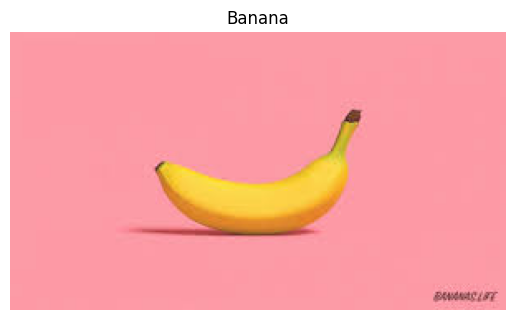

In [ ]:
classes = ["Apple", "Mango", "Banana"]
def show_image_with_label(img, label):
  plt.imshow(img)
  plt.title(classes[label])
  plt.axis('off')
  plt.show()

show_image_with_label(img_rgb, predicted_label)

<ipython-input-15-1cac9a74889f>:14: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)


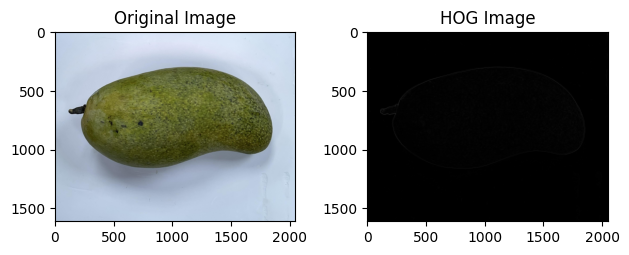

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Đường dẫn đến ảnh
image_path = '/content/drive/MyDrive/Fruit Classify/c.jpg'

# Đọc ảnh
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tính toán giá trị HOG cho ảnh
hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

# Hiển thị ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Hiển thị giá trị HOG
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Image")

plt.tight_layout()
plt.show()

<ipython-input-7-e6168fdb98c9>:14: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)


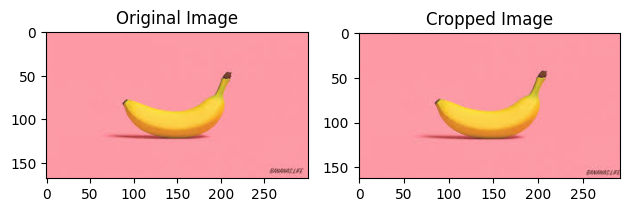

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

# Đường dẫn đến ảnh
image_path = '/content/drive/MyDrive/Fruit Classify/img_3361.jpeg'

# Đọc ảnh
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tính toán giá trị HOG cho ảnh
hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

# Tìm bounding box của đối tượng dựa trên giá trị HOG
nonzero_indices = np.nonzero(hog_image > 0.5)  # Chọn các điểm có giá trị HOG lớn hơn ngưỡng 0.5
y_min, y_max = np.min(nonzero_indices[0]), np.max(nonzero_indices[0])
x_min, x_max = np.min(nonzero_indices[1]), np.max(nonzero_indices[1])

# Cắt ảnh theo bounding box
cropped_image = image[y_min:y_max, x_min:x_max]

# Hiển thị ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Hiển thị ảnh đã cắt
plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title("Cropped Image")

plt.tight_layout()
plt.show()


<ipython-input-14-25c9cc919fa5>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(prediction[1][0])


Predicted label: 1


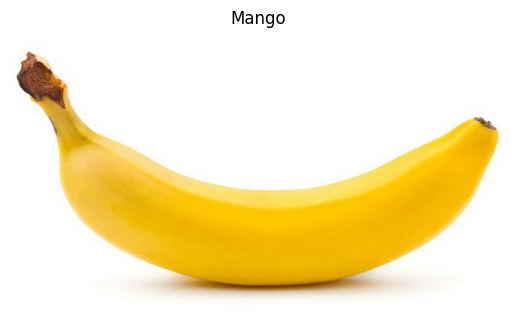

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import glob

image_path = '/content/drive/MyDrive/Fruit Classify/chuoi.jpg'

def _hog(img, B):
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
  mag,ang = cv2.cartToPolar(gx, gy)
  bins = np.int32((ang*B)/(2*np.pi))
  bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
  mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
  hists = [np.bincount(b.ravel(), m.ravel(), B) for b,m in zip(bin_cells, mag_cells)]
  hist = np.hstack(hists)
  return hist

def hog(img, B):
  r = img[:, :, 0]
  g = img[:, :, 1]
  b = img[:, :, 2]
  r = _hog(r, B)
  g = _hog(g, B)
  b = _hog(b, B)
  hist = np.concatenate((r,g,b))
  return hist

import cv2
import features

model_path = '/content/drive/MyDrive/Fruit Classify/model.xml'
svm = cv2.ml.SVM_load(model_path)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

features = hog(img_rgb, B=16)

features = features.astype(np.float32)
prediction = svm.predict(np.array([features]))
predicted_label = int(prediction[1][0])

print(f"Predicted label: {predicted_label}")

classes = ["Apple", "Mango", "Banana"]
def show_image_with_label(img, label):
  plt.imshow(img)
  plt.title(classes[label])
  plt.axis('off')
  plt.show()

show_image_with_label(img_rgb, predicted_label)